Comparison of World Model and Real Env

Use MSE
MSE of 0 perfect similarity,

In [52]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [53]:
pkl_obs_file = open('/home/student/PycharmProjects/worldmodel/WorldModelsExperiments/dashboarddash/obsfordiff.pkl', 'rb')
obs = pickle.load(pkl_obs_file)

In [13]:
obs.shape

(5, 132, 240, 3)

In [57]:
obs_real = []
obs_sim = []
obs_diff = []
for ob in obs:
    ob_sim, ob_real, ob_diff = np.split(ob, 3, axis=1)
    obs_sim.append(ob_sim)
    obs_real.append(ob_real)
    obs_diff.append(ob_diff)

In [31]:
def calc_mse(img1, img2):
    err = np.sum((img1.astype('float') - img2.astype('float'))**2)
    err /= float(img1.shape[0] * img1.shape[1])
    return err

In [34]:
mse = []
for i in range(len(obs_sim)):
    mse.append(calc_mse(obs_sim[i], obs_real[i]))

0
1
2
3
4


In [ ]:
plt.plot(mse)
plt.show()

In [58]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

In [59]:
mse_error = []
ssim_error = []
for i in range(len(obs_sim)):
    mse_error.append(mean_squared_error(obs_sim[i], obs_real[i]))
    ssim_error.append(ssim(obs_sim[i], obs_real[i], dynamic_range=obs_real[i].max()-obs_real[i].min(), multichannel=True))

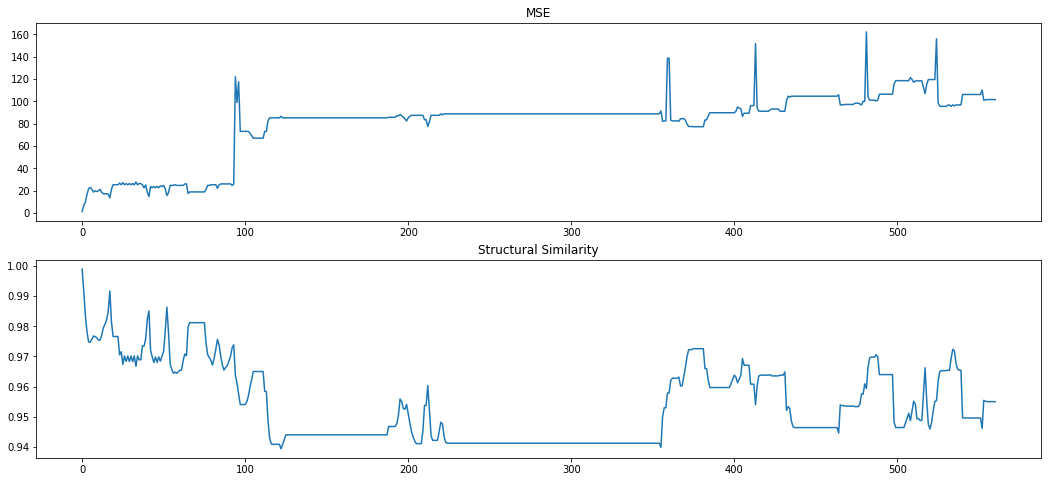

In [64]:
plt.subplots(2,1, figsize=(18,8))
plt.subplot(2,1,1)
plt.title('MSE')
plt.plot(mse_error)
plt.subplot(2,1,2)
plt.title('Structural Similarity')
plt.plot(ssim_error)
plt.show()